<a href="https://colab.research.google.com/github/MarvinLopezOsorio/AnaliticaPredictiva_Tareas/blob/main/Clasificacion%20de%20vinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

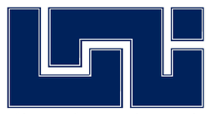

</center>

<h1><b>
Dirección de Estudios de Posgrado y Educación Continua
<h2><b>
Analítica Predictiva y Machine Learning con R, Python y Databricks


[UNI-DEPEC](https://posgrado.uni.edu.ni)

**Estudiante:** Marvin José López Osorio


# **Tarea Modelos Supervisados**
## **Modelo de Clasificación: Tipos de vino**
Los set de datos procesados corresponden a datos de variantes de vino blanco y tinto. Se utilizó como fuente el [dataset en Kaggle](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) que referencia al [repositorio de la University of California, Irvine](https://archive.ics.uci.edu/ml/datasets/wine+quality). Para dar un giro al análisis realizado, este Colab explora la posibilidad de clasificar un vino en tinto o blanco, en función de sus características fisicoquímicas. 

###**Carga de librerias necesarias**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

###**Obtención de los datos**
Los datos originales están contenidos en 2 archivos diferentes. Primeramente se agregó a cada set de datos una etiqueta (que servirá de variable objetivo) y luego se combinaron ambos set de datos.

In [8]:
#Referencias al repositorio de origen
repository = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'
red_wine_file = 'winequality-red.csv'
white_wine_file = 'winequality-white.csv'

#Leer datos
red_wine = pd.read_csv(repository + red_wine_file, sep=';')
white_wine = pd.read_csv(repository + white_wine_file, sep=';')

#Agregar etiquetas y combinar los dataset
red_wine['wine_class'] = 0
white_wine['wine_class'] = 1
wines = red_wine.append(white_wine)
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [4]:
wines.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_class                int64
wine_type                object
dtype: object

In [7]:
!pip install pycaret

     |████████████████████████████████| 288 kB 4.2 MB/s 
     |████████████████████████████████| 2.0 MB 36.8 MB/s 
     |████████████████████████████████| 6.8 MB 29.2 MB/s 
     |████████████████████████████████| 113 kB 76.1 MB/s 
     |████████████████████████████████| 15.5 MB 15.6 MB/s 
     |████████████████████████████████| 261 kB 79.1 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 167 kB 71.8 MB/s 
     |████████████████████████████████| 1.7 MB 75.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 5.5 MB/s 
     |████████████████████████████████| 1.3 MB 56.9 MB/s 
     |████████████████████████████████| 10.1 MB 46.6 MB/s 
     |████████████████████████████████| 675 kB 45.3 MB/s 
     |████████████████████████████████| 62 kB 896 kB/s 
     |██████████████████

In [19]:
from pycaret.classification import *
model = setup(wines.drop(columns=['quality']),target='wine_class', normalize=True,silent=True)

,Description,Value
0,session_id,2339
1,Target,wine_class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(6497, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [20]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9965,0.9994,0.9985,0.9968,0.9977,0.9904,0.9905,0.562
lda,Linear Discriminant Analysis,0.9952,0.9965,0.9968,0.9968,0.9968,0.9869,0.9869,0.025
ridge,Ridge Classifier,0.9949,0.0000,0.9968,0.9965,0.9967,0.9863,0.9863,0.016
lightgbm,Light Gradient Boosting Machine,0.9947,0.9992,0.9980,0.9951,0.9965,0.9856,0.9857,0.136
svm,SVM - Linear Kernel,0.9945,0.0000,0.9968,0.9959,0.9964,0.9850,0.9851,0.024
rf,Random Forest Classifier,0.9943,0.9996,0.9988,0.9937,0.9962,0.9844,0.9845,0.750
lr,Logistic Regression,0.9941,0.9964,0.9959,0.9962,0.9961,0.9839,0.9839,0.034
gbc,Gradient Boosting Classifier,0.9941,0.9994,0.9977,0.9945,0.9961,0.9838,0.9839,0.626
knn,K Neighbors Classifier,0.9938,0.9964,0.9962,0.9956,0.9959,0.9833,0.9833,0.127
ada,Ada Boost Classifier,0.9930,0.9984,0.9956,0.9951,0.9954,0.9809,0.9809,0.229


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=2339, verbose=0,
                     warm_start=False)

In [21]:
lda_model = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9912,0.9893,0.9942,0.9942,0.9942,0.9762,0.9762
1,0.9956,0.9998,0.9971,0.9971,0.9971,0.9881,0.9881
2,0.9890,0.9934,0.9942,0.9913,0.9927,0.9701,0.9701
3,0.9978,1.0000,0.9971,1.0000,0.9985,0.9941,0.9941
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9978,0.9995,0.9971,1.0000,0.9985,0.9941,0.9941
6,0.9912,0.9891,0.9971,0.9913,0.9942,0.9760,0.9761
7,0.9978,1.0000,1.0000,0.9971,0.9985,0.9940,0.9940
8,0.9934,0.9943,0.9942,0.9971,0.9956,0.9821,0.9821
9,0.9978,0.9997,0.9971,1.0000,0.9985,0.9941,0.9941


In [22]:
evaluate_model(lda_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [23]:
lda_tuned = tune_model(lda_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9912,0.9893,0.9942,0.9942,0.9942,0.9762,0.9762
1,0.9956,0.9998,0.9971,0.9971,0.9971,0.9881,0.9881
2,0.9890,0.9934,0.9942,0.9913,0.9927,0.9701,0.9701
3,0.9978,1.0000,0.9971,1.0000,0.9985,0.9941,0.9941
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9978,0.9995,0.9971,1.0000,0.9985,0.9941,0.9941
6,0.9912,0.9891,0.9971,0.9913,0.9942,0.9760,0.9761
7,0.9978,1.0000,1.0000,0.9971,0.9985,0.9940,0.9940
8,0.9934,0.9943,0.9942,0.9971,0.9956,0.9821,0.9821
9,0.9978,0.9997,0.9971,1.0000,0.9985,0.9941,0.9941


In [24]:
evaluate_model(lda_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…